In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
pd.options.display.max_columns = 999

In [3]:
url = r"C:\Users\rergu\OneDrive\IronHack\datasets\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

In [14]:
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
994977,1101184,B0C2J61LSG,"What if i fall? Oh, but my darling, what if yo...",5.0,1,10.99,False,0,Handmade Artwork
520311,559639,B082YMQ8FL,Arctix Boy's Ronan Insulated Winter Jacket Ron...,4.6,50,57.68,False,0,Sports & Outdoors
1808648,2034234,B09H147J84,Sharplace 200/Pack Disposable Microphone Cover...,0.0,0,12.09,False,0,DJ & VJ Equipment
798196,859895,B08H7RNBMQ,Personalised Embroidered Name School Book Bag ...,5.0,8,12.99,False,0,School & Educational Supplies
156894,168893,B09C82B2XN,Golf Bags For Men Left Hand Right Weathersof G...,0.0,0,65.39,False,0,Sports & Outdoors
2055107,2321098,B0CCQJ3GRV,FOMIYES 3pcs Women's Hair Band Sports Headband...,0.0,0,10.57,False,0,Sports & Outdoors
800022,862151,B09FPP84K7,wopin Super Mario Backpack Kids School Backpac...,4.7,14,26.99,False,0,School & Educational Supplies
2223280,2570221,B08THKYZGL,"Cute Cloud Night Light Kids,【16 Colors+Remote】...",4.4,2199,13.97,False,1000,Baby
1215071,1341809,B0B5GXC7J1,GZDD Rubber Cycling Shoes Men Nonslip Outdoor ...,0.0,0,69.99,False,0,Sports & Outdoors
2417235,2790277,B09LDB86VV,"Snow Sled,Kids Winter Sled Toboggan Preium Pla...",0.0,0,3.69,False,0,Snow Sledding Equipment


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [78]:
# frequency table

proportion_table = df['category'].value_counts(normalize=True)
frequency_table = df['category'].value_counts(normalize=True)
frequency_table.sort_values(ascending=False).head(5)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

In [113]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [84]:
# create crosstable same as value counts but create datraframne

my_cross_table = pd.crosstab(index= df['category'], columns='count').reset_index()
my_cross_table.sort_values(by='count', ascending=False, inplace=True)

<Axes: xlabel='category', ylabel='count'>

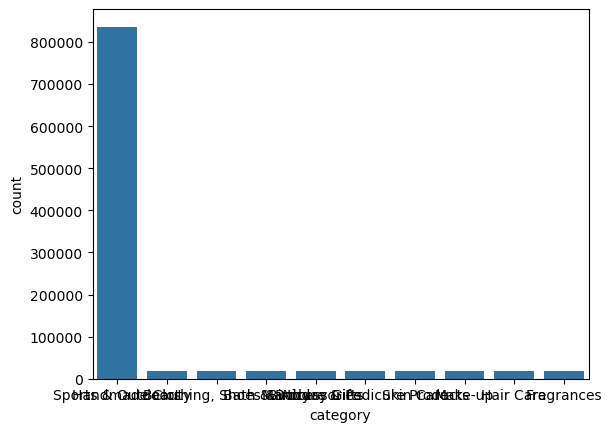

In [88]:
sns.barplot(x=my_cross_table['category'].iloc[:10], y=my_cross_table['count'].iloc[:10])

In [92]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [20]:
df_price = df[df['price'] != 0]

In [22]:
price_mean = df_price['price'].mean()
price_median = df_price['price'].median()
price_std = df_price['price'].std()
price_var = df_price['price'].var()
price_mode = df_price['price'].mode()[0]
price_min = df_price['price'].min()
price_max = df_price['price'].max()
price_range = price_max - price_min
price_mean, price_median, price_std, price_var, price_mode, price_min, price_max, price_range

(89.24453985892306,
 19.09,
 345.61018177054603,
 119446.39774346988,
 9.99,
 0.01,
 100000.0,
 99999.99)

In [24]:
price_quantile = df_price['price'].quantile([0.25,0.5,0.75])
price_quantile

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

In [25]:
price_skweness = df_price['price'].skew()
price_kurtosis = df_price['price'].kurtosis()
price_skweness, price_kurtosis

(27.49288136475136, 4241.586073357471)

<Axes: xlabel='price', ylabel='Count'>

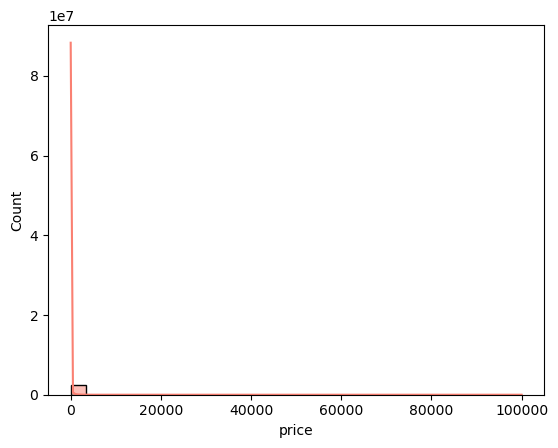

In [28]:
sns.histplot(df_price['price'], bins=30,kde=True, color='salmon')

<Axes: ylabel='price'>

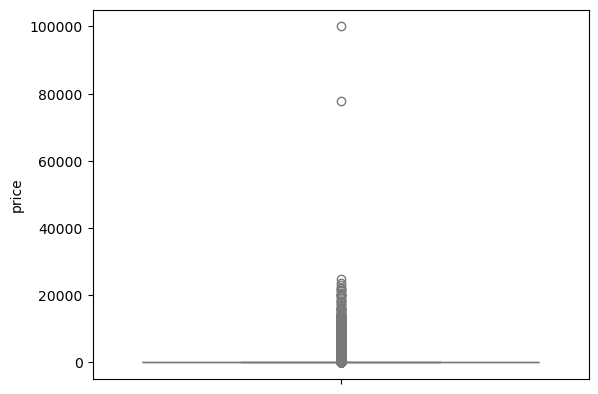

In [112]:
sns.boxplot(data = df['price'], color="lightblue")

In [10]:
df_reviews = df[df['reviews'] != 0]

In [11]:
stars_mean = df_reviews['stars'].mean()
stars_median = df_reviews['stars'].median()
stars_std = df_reviews['stars'].std()
stars_var = df_reviews['stars'].var()
stars_mode = df_reviews['stars'].mode()[0]
stars_min = df_reviews['stars'].min()
stars_max = df_reviews['stars'].max()
stars_range = stars_max - stars_min
stars_mean, stars_median, stars_std, stars_var, stars_mode, stars_min, stars_max, stars_range

(4.31916076222691,
 4.4,
 0.5552867504614637,
 0.3083433752380519,
 4.5,
 1.0,
 5.0,
 4.0)

In [18]:
stars_quantile = df_reviews['stars'].quantile([0.25,0.5,0.75])
stars_skewness = df_reviews['stars'].skew()
stars_kurtosis = df_reviews['stars'].kurtosis()
stars_kurtosis, stars_skewness, stars_quantile

(9.78193769066435,
 -2.3795681122127945,
 0.25    4.1
 0.50    4.4
 0.75    4.6
 Name: stars, dtype: float64)

<Axes: xlabel='stars', ylabel='Count'>

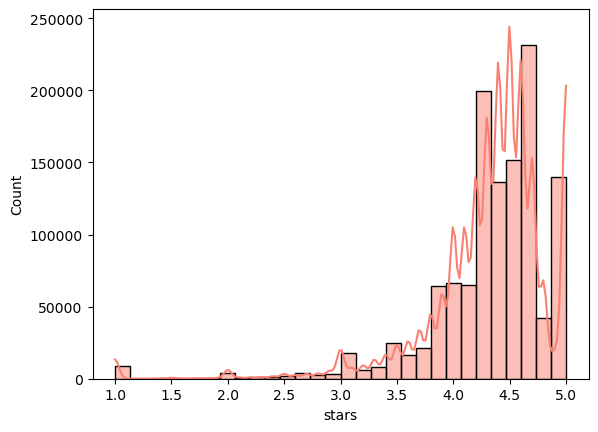

In [15]:
sns.histplot(df_reviews['stars'], kde=True, bins=30, color='salmon')

<Axes: ylabel='stars'>

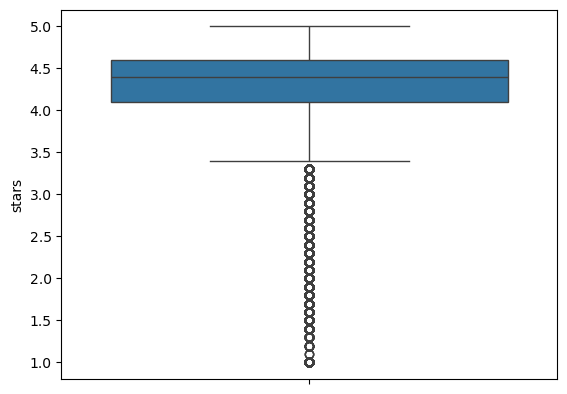

In [19]:
sns.boxplot(data=df_reviews['stars'])